In [1]:
! pip install albumentations
! pip install segmentation_models
! pip install rasterio
# sudo add-apt-repository ppa:ubuntugis/ppa
# sudo apt-get update
# sudo apt-get install gdal-bin

# these 2 command install dependencies for gdal libs

# sudo apt install libpq5=12.10-0ubuntu0.20.04.1
# sudo apt install libpq-dev


In [1]:
# Model stuff
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize
import segmentation_models as sm
from sklearn.model_selection import train_test_split
import model_utility
import os
import rasterio

#path sorting
import glob
from pathlib import Path
import re

#math
import numpy as np
import matplotlib.pyplot as plt
import math

Segmentation Models: using `keras` framework.


# What are we doing today?

In [2]:
model_path = "models/"
type = "shadows_zhen_edit_LR_0.02"
training_size = "225"
epoch_num = "200"
backbone = "resnet34"

model_path = f"{model_path}{type}_{training_size}im_{epoch_num}e.h5"

# Create training data

In [3]:
X, Y = [], []

X, Y = model_utility.data_gather(X, Y, image_type="cloud_training_images", mask_type="cloud_training_shadow_masks")

225 225


In [4]:
x_train, x_test, y_train, y_test = model_utility.preparer_data_for_training(X, Y, backbone)

(191, 256, 256, 10)
(34, 256, 256, 10)
(191, 256, 256, 1)
(34, 256, 256, 1)


In [5]:
model = model_utility.define_model(backbone)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 10)]                                                             
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   30          ['data[0][0]']                   
                                10)                                                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                                10)                                                         

In [6]:
history = model_utility.fit_model(x_train, y_train, model, model_path, batch_size = 16, epochs = int(epoch_num), validation_split = .13)

results = model.evaluate(x_test, y_test)

model_utility.save_model_history(model_path, model, history, results)

Epoch 1/200
11/11 [==============================] - ETA: 0s - loss: 0.3653 - iou_score: 0.0301 - accuracy: 0.8787
Epoch 1: val_iou_score improved from -inf to 0.00000, saving model to models/shadows_zhen_edit_LR_0.02_225im_200e.h5
11/11 [==============================] - 14s 567ms/step - loss: 0.3653 - iou_score: 0.0301 - accuracy: 0.8787 - val_loss: 114678323905222934528.0000 - val_iou_score: 4.7571e-10 - val_accuracy: 0.9742
Epoch 2/200
11/11 [==============================] - ETA: 0s - loss: 0.2160 - iou_score: 0.0280 - accuracy: 0.9475
Epoch 2: val_iou_score improved from 0.00000 to 0.02751, saving model to models/shadows_zhen_edit_LR_0.02_225im_200e.h5
11/11 [==============================] - 3s 316ms/step - loss: 0.2160 - iou_score: 0.0280 - accuracy: 0.9475 - val_loss: 332526400831488.0000 - val_iou_score: 0.0275 - val_accuracy: 0.0369
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 0.2090 - iou_score: 0.0246 - accuracy: 0.9475
Epoch 3: val_iou_score did no

# Plots

Which model is this? - shadows_zhen_edit_LR_0.json


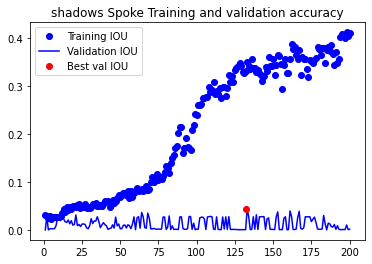

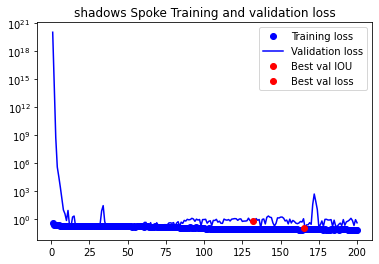

Last Train IOU Score:  0.4094716012477875
Last Train Loss Score:  0.07011149078607559
Last Validation IOU Score:  0.0014066726434975863
Last Validation Loss Score:  0.40633678436279297
shadows_zhen_edit_LR_0.02
225
200


In [7]:
model_utility.display_results(model_path)
print(type)
print(training_size)
print(epoch_num)

In [6]:
model_path = "models/"
type = "cloud_CShape_pre"
training_size = "225"
epoch_num = "100"
backbone = "resnet34"

model_path = f"{model_path}{type}_{training_size}im_{epoch_num}e.h5"

In [2]:
from tensorflow import keras

model = keras.models.load_model("models/shadows_zhen_edit_225im_200e.h5", compile = False)
model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()], )

print(type)
print(training_size)
print(epoch_num)

NameError: name 'model_path' is not defined

# testing with images outside of train/test(light)

The cloud_training_images/ training set is made of 225 images
(225, 10, 256, 256)
HLS.L30.T17MRR.2021219T152101.v2.0_HLS_0_0.tif 0
(10, 256, 256)


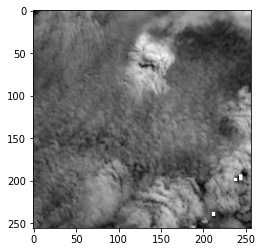

1/1 [==============================] - 2s 2s/step


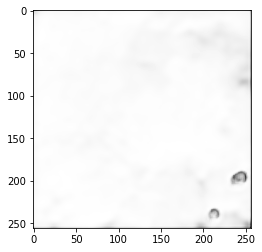

HLS.L30.T17MRR.2021219T152101.v2.0_HLS_0_1.tif 1
(10, 256, 256)


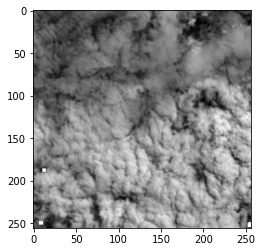

1/1 [==============================] - 0s 32ms/step


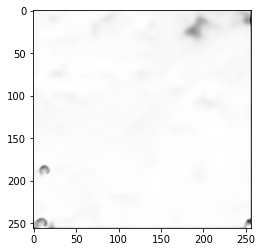

HLS.L30.T17MRR.2021219T152101.v2.0_HLS_0_10.tif 2
(10, 256, 256)


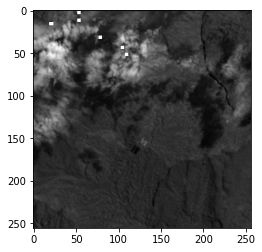

1/1 [==============================] - 0s 34ms/step


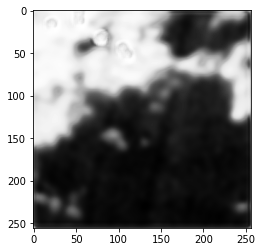

HLS.L30.T17MRR.2021219T152101.v2.0_HLS_0_11.tif 3
(10, 256, 256)


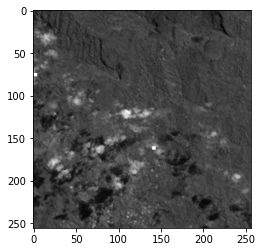

1/1 [==============================] - 0s 33ms/step


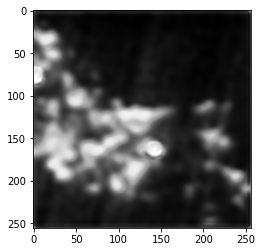

HLS.L30.T17MRR.2021219T152101.v2.0_HLS_0_12.tif 4
(10, 256, 256)


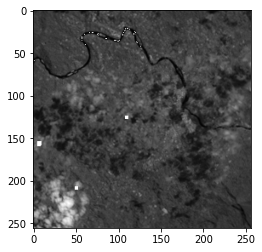

1/1 [==============================] - 0s 39ms/step


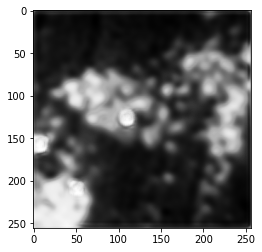

HLS.L30.T17MRR.2021219T152101.v2.0_HLS_0_13.tif 5
(10, 256, 256)


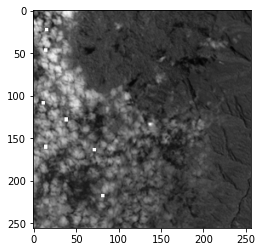

1/1 [==============================] - 0s 30ms/step


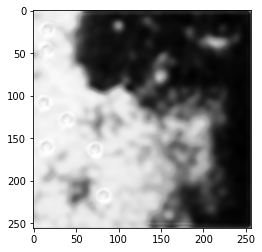

HLS.L30.T17MRR.2021219T152101.v2.0_HLS_0_14.tif 6
(10, 256, 256)


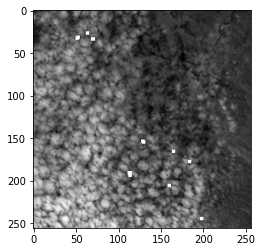

1/1 [==============================] - 0s 27ms/step


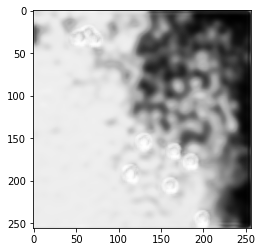

HLS.L30.T17MRR.2021219T152101.v2.0_HLS_0_2.tif 7
(10, 256, 256)


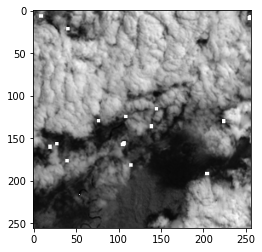

1/1 [==============================] - 0s 38ms/step


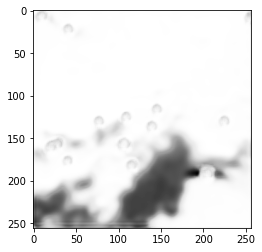

HLS.L30.T17MRR.2021219T152101.v2.0_HLS_0_3.tif 8
(10, 256, 256)


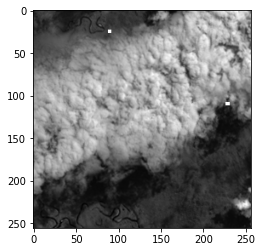

1/1 [==============================] - 0s 32ms/step


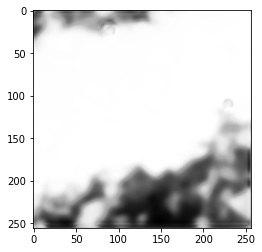

HLS.L30.T17MRR.2021219T152101.v2.0_HLS_0_4.tif 9
(10, 256, 256)


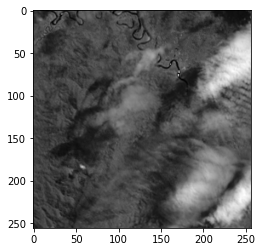

1/1 [==============================] - 0s 28ms/step


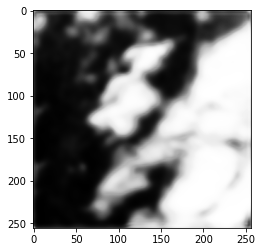

In [8]:
model_utility.model_testing(model, "cloud_training_images/", 10, backbone)

8
models/shadows_zhen_edit_LR_225im_200e.json
Which model is this? - shadows_zhen_edit_LR_225im_200e.json


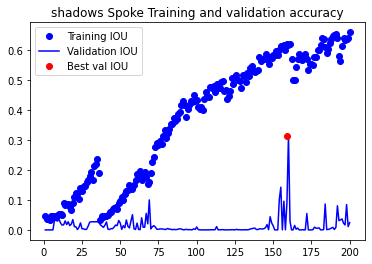

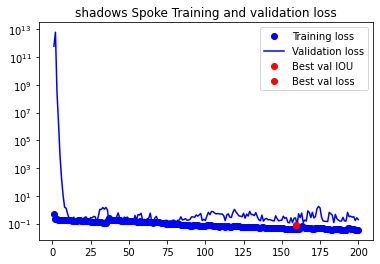

Last Train IOU Score:  0.6594099402427673
Last Train Loss Score:  0.03626592084765434
Last Validation IOU Score:  0.024287380278110504
Last Validation Loss Score:  0.19258399307727814
models/shadows_only1s_floats_callback_43state_225im_10e.json
Which model is this? - shadows_only1s_floats_callback_43state_225im_10e.json


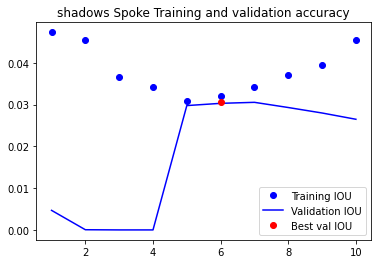

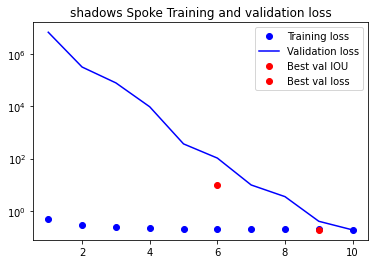

Last Train IOU Score:  0.045466601848602295
Last Train Loss Score:  0.1917882114648819
Last Validation IOU Score:  0.0264895036816597
Last Validation Loss Score:  0.18495409190654755
models/shadows_only1s_floats_callback_225im_200e.json
Which model is this? - shadows_only1s_floats_callback_225im_200e.json


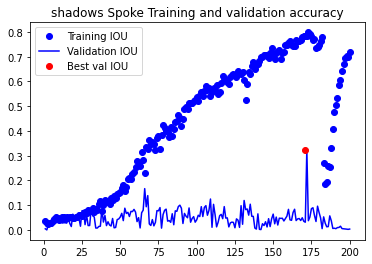

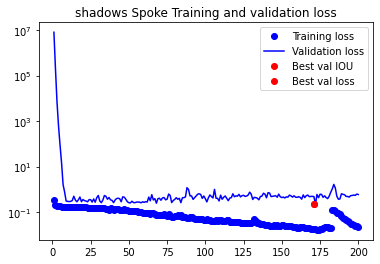

Last Train IOU Score:  0.7180662155151367
Last Train Loss Score:  0.02285611815750599
Last Validation IOU Score:  0.0034762341529130936
Last Validation Loss Score:  0.5892491936683655
models/shadows_225im_100e.json
Which model is this? - shadows_225im_100e.json


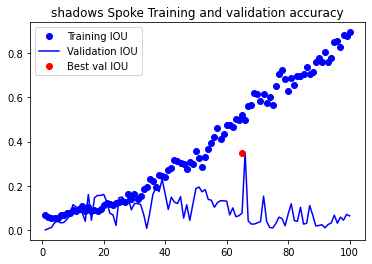

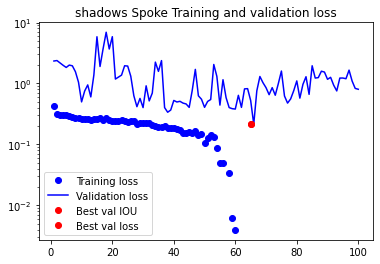

Last Train IOU Score:  0.8951641321182251
Last Train Loss Score:  -0.3020864427089691
Last Validation IOU Score:  0.06353285163640976
Last Validation Loss Score:  0.8035009503364563
models/shadows_zhen_edit_LR_low_225im_200e.json
Which model is this? - shadows_zhen_edit_LR_low_225im_200e.json


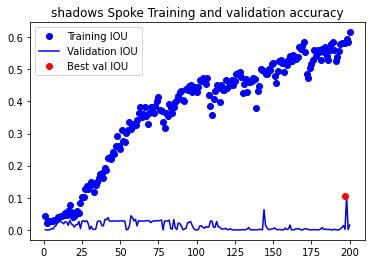

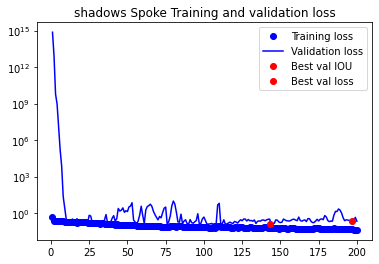

Last Train IOU Score:  0.6152510046958923
Last Train Loss Score:  0.04096728563308716
Last Validation IOU Score:  0.015350300818681717
Last Validation Loss Score:  0.21258583664894104
models/shadows_only1s_floats_225im_100e.json
Which model is this? - shadows_only1s_floats_225im_100e.json


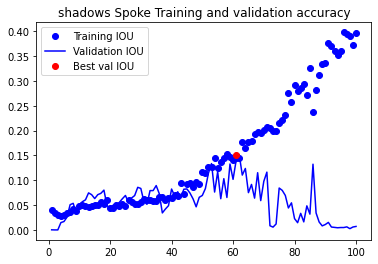

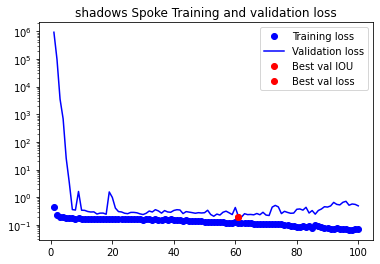

Last Train IOU Score:  0.39555028080940247
Last Train Loss Score:  0.0688956156373024
Last Validation IOU Score:  0.0070024351589381695
Last Validation Loss Score:  0.48557278513908386
models/shadows_zhen_edit_LR_0.json
Which model is this? - shadows_zhen_edit_LR_0.json


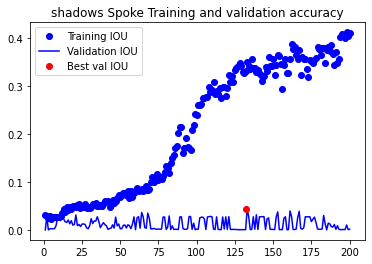

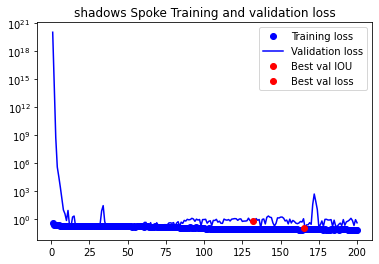

Last Train IOU Score:  0.4094716012477875
Last Train Loss Score:  0.07011149078607559
Last Validation IOU Score:  0.0014066726434975863
Last Validation Loss Score:  0.40633678436279297
models/shadows_zhen_edit_225im_200e.json
Which model is this? - shadows_zhen_edit_225im_200e.json


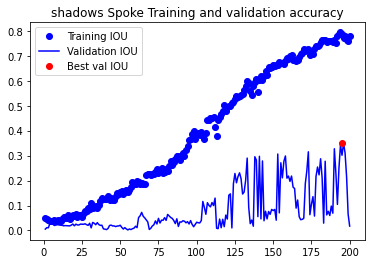

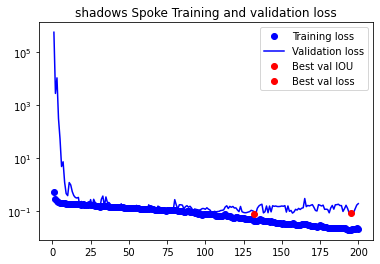

Last Train IOU Score:  0.7807157039642334
Last Train Loss Score:  0.021033070981502533
Last Validation IOU Score:  0.0174697358161211
Last Validation Loss Score:  0.19329296052455902


In [11]:
json_list = glob.glob("models/shadows_*.json")

json_list.remove("models/shadows_only1s_floats_callback_43state_225im_200e.json")

print(len(json_list))

for model_hist in json_list:
    print(model_hist)
    model_utility.display_results(model_hist)


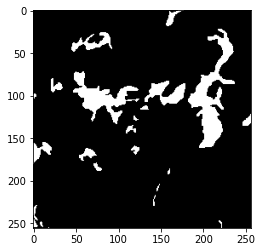

In [20]:
test_mask_image_path = "../datasets/cloud_training_shadow_masks/HLS.L30.T17MRR.2021219T152101.v2.0_shadow_HLS_0_10.tif"
mask = rasterio.open(test_mask_image_path)

mask = mask.read()

mask.shape
mask  = rasterio.plot.reshape_as_image(mask)


plt.imshow(mask, cmap = "gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


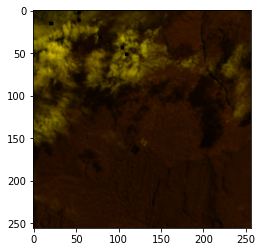

<AxesSubplot:>

In [21]:
testing_image_path = "../datasets/cloud_training_images/HLS.L30.T17MRR.2021219T152101.v2.0_HLS_0_10.tif"
testing_image = rasterio.open(testing_image_path)
testing_image = testing_image.read()

rasterio.plot.show(testing_image[5:8])